In [1]:
# ap_star_white_dwarf_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from astropy import units as u
from astropy.constants import M_sun

In [8]:
# Step 1: Load the Ap star catalog
ap_catalog = pd.read_csv("Ap_stars_catalog.csv")
print("Columns available:", ap_catalog.columns)
ap_catalog.head()


Columns available: Index(['SpecID', 'LMJD', 'ObsID', 'RAJ2000', 'DEJ2000', 'SNRg', 'GMag',
       'G0mag', '__BP-RP_', '__BP-RP_0', 'a', 'Dist', 'liblamost', 'libnor36',
       'Note', 'GaiaDR3', 'Simbad'],
      dtype='object')


,SpecID,LMJD,ObsID,RAJ2000,DEJ2000,SNRg,GMag,G0mag,__BP-RP_,__BP-RP_0,a,Dist,liblamost,libnor36,Note,GaiaDR3,Simbad
0,spec-55875-B7505_sp16-019,55875,2416019,29.31,59.79,58.30,12.98,0.52,0.64,0.12,0.58,1721.97,kB9.5hA2mA4 bl4077bl4130Si3856Si5041Si5056,A0 II-III bl4077bl4130Si3856Si5041Si5056,NaN,507868307825704320,Simbad
1,spec-55878-B87806_1_sp16-106,55878,4116106,46.79,53.86,193.67,10.15,-0.09,0.59,0.02,0.58,679.40,B8 III (bl4077)bl4130Si3856Si5056Cr4172,B8 III-IV bl4130Si3856Si5041Si5056Cr4172,NaN,447095826254298112,Simbad
2,spec-55880-B8004_2_sp10-036,55880,5010036,38.40,53.08,119.80,11.69,0.67,0.25,-0.04,0.58,1243.81,kB8hA0mA1 bl4077bl4130Si3856Si5041Si5056Cr4172,B9 III bl4077bl4130Si3856Si5041Si5056Cr4172,NaN,452313936634063616,Simbad
3,spec-55880-B8004_3_sp14-136,55880,5114136,38.91,55.00,106.87,12.03,1.00,0.42,0.04,0.57,1161.03,B9 IV Cr4172,B9.5 IV Cr4172Sr4216,NaN,454234611657966720,Simbad
4,spec-55892-F9204_sp12-154,55892,8312154,52.41,6.09,302.66,11.56,1.13,0.34,-0.04,0.59,873.41,B9 IV-V bl4077bl4130Si3856Si5041Si5056Cr4172,B9 IV-V bl4077bl4130Si3856Si5041Si5056Cr4172,NaN,3276185836320362624,Simbad


In [12]:
# Step 1: Estimate Teff from BP-RP color
def estimate_teff_from_bp_rp(bp_rp):
    if pd.notnull(bp_rp) and 0.0 < bp_rp < 1.8:
        return 8500 - 3800 * bp_rp
    else:
        return np.nan

ap_catalog['Teff'] = ap_catalog['__BP-RP_'].apply(estimate_teff_from_bp_rp)

In [13]:
# Step 2: Estimate Mass from Teff
def estimate_mass_from_teff(teff):
    if pd.notnull(teff) and teff > 7000:
        return 0.0028 * teff - 5.5
    else:
        return np.nan

ap_catalog['Estimated_Mass'] = ap_catalog['Teff'].apply(estimate_mass_from_teff)


In [14]:
# Step 3: Estimate Stellar Lifetime and predict white dwarf transition
def estimate_lifetime_and_status(mass):
    if pd.notnull(mass) and mass > 0:
        lifetime_gyr = 10 * (mass)**(-2.5)  # Approximate main sequence lifetime in Gyr
        if lifetime_gyr < 13.8:  # Universe age threshold (Gyr)
            return lifetime_gyr, "Will become White Dwarf"
        else:
            return lifetime_gyr, "Still on Main Sequence"
    else:
        return np.nan, "Mass not defined"

# Apply the function and split the results into two new columns
ap_catalog[['Estimated_Lifetime_Gyr', 'White_Dwarf_Status']] = ap_catalog['Estimated_Mass'].apply(
    lambda m: pd.Series(estimate_lifetime_and_status(m))
)

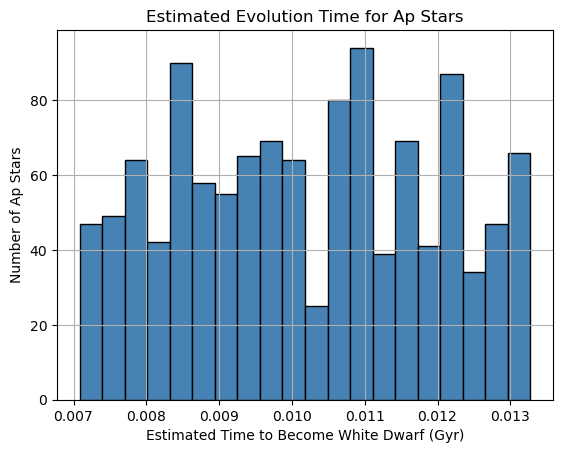

In [16]:
# Plot for estimated main-sequence lifetimes
import matplotlib.pyplot as plt
plt.hist(ap_catalog['Estimated_Lifetime_Gyr'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel("Estimated Time to Become White Dwarf (Gyr)")
plt.ylabel("Number of Ap Stars")
plt.title("Estimated Evolution Time for Ap Stars")
plt.grid(True)
plt.show()
